In [49]:
import os
import plotly.express as px
from PIL import Image
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!python generate_data_folders.py

In [4]:
# Chemin vers le dataset JPG
jpg_dir = "data/Main_dataset"

# Initialiser des variables pour l'analyse
image_shapes = {}
class_distribution = {}

# Parcourir les sous-dossiers (classes) dans le dossier principal
for class_name in os.listdir(jpg_dir):
    class_path = os.path.join(jpg_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Initialiser les structures pour chaque classe
    image_shapes[class_name] = []
    class_distribution[class_name] = 0

    # Parcourir les fichiers JPG
    for file_name in os.listdir(class_path):
        if not file_name.lower().endswith(".jpg"):
            continue

        jpg_path = os.path.join(class_path, file_name)
        try:
            # Charger l'image JPG
            with Image.open(jpg_path) as img:
                width, height = img.size

            # Collecter les dimensions de l'image
            image_shapes[class_name].append((height, width))

            # Mise à jour du compteur pour cette classe
            class_distribution[class_name] += 1

        except Exception as e:
            # Afficher une erreur et continuer
            print(f"Erreur lors du chargement de {jpg_path} : {e}")

# Affichage des résultats
print("Distribution des classes :", class_distribution)
for class_name, shapes in image_shapes.items():
    print(f"Dimensions des images ({class_name}) :", Counter(shapes))


Distribution des classes : {'Degenerative_Infectious_Diseases': 10000, 'Normal': 10000, 'Higher_Density': 10000, 'Lower_Density': 10000, 'Mediastinal_Changes': 10000, 'Chest_Changes': 10000, 'Encapsulated_Lesions': 10000, 'Obstructive_Pulmonary_Diseases': 10000}
Dimensions des images (Degenerative_Infectious_Diseases) : Counter({(256, 256): 10000})
Dimensions des images (Normal) : Counter({(256, 256): 10000})
Dimensions des images (Higher_Density) : Counter({(256, 256): 10000})
Dimensions des images (Lower_Density) : Counter({(256, 256): 10000})
Dimensions des images (Mediastinal_Changes) : Counter({(256, 256): 10000})
Dimensions des images (Chest_Changes) : Counter({(256, 256): 10000})
Dimensions des images (Encapsulated_Lesions) : Counter({(256, 256): 10000})
Dimensions des images (Obstructive_Pulmonary_Diseases) : Counter({(256, 256): 10000})


In [15]:
# Préparation des données pour l'histogramme
data = []
for class_name, count in class_distribution.items():
    data.append({"Classe": class_name, "Nombre d'images": count})

df = pd.DataFrame(data)
ordered_classes = ["Normal"] + [cls for cls in class_distribution.keys() if cls != "Normal"]
df["Classe"] = pd.Categorical(df["Classe"], categories=ordered_classes, ordered=True)

# Création de l'histogramme
fig = px.bar(df.sort_values("Classe"), x="Classe", y="Nombre d'images", title="Distribution des images par classe")
fig.show()

In [26]:
df_grouped = pd.DataFrame({
    "Classe": ["Normal", "Malade"],
    "Nombre d'images": [class_distribution["Normal"], sum(v for k, v in class_distribution.items() if k != "Normal")]
})

# Création de l'histogramme (Normal vs Malade)
fig2 = px.bar(df_grouped, x="Classe", y="Nombre d'images", title="Distribution des images : Normal vs Malade")
fig2.show()

In [37]:
# Création du DataFrame pour l'histogramme complet
data = [{"Classe": class_name, "Nombre d'images": count} for class_name, count in class_distribution.items()]
df = pd.DataFrame(data)

# Définir l'ordre avec "Normal" en premier
ordered_classes = ["Normal"] + [cls for cls in class_distribution.keys() if cls != "Normal"]
df["Classe"] = pd.Categorical(df["Classe"], categories=ordered_classes, ordered=True)

# Définition des couleurs
color_map_full = {cls: "#EB0000" for cls in class_distribution.keys()}  # Tout en rouge
color_map_full["Normal"] = "#4CAF50"  # Normal en vert

# Création de l'histogramme (toutes les classes)
fig1 = px.bar(df.sort_values("Classe"), x="Classe", y="Nombre d'images",
              color="Classe", color_discrete_map=color_map_full)
fig1.update_layout(showlegend=False)  # Supprimer la légende
fig1.show()



In [36]:
# Regroupement des classes malades sous "Malade"
df_grouped = pd.DataFrame({
    "Classe": ["Normal", "Malades"],
    "Nombre d'images": [class_distribution["Normal"], sum(v for k, v in class_distribution.items() if k != "Normal")]
})

# Définition des couleurs pour le second histogramme
color_map_grouped = {"Normal": "#4CAF50", "Malades": "#EB0000"}

# Création de l'histogramme (Normal vs Malade)
fig2 = px.bar(df_grouped, x="Classe", y="Nombre d'images",
              color="Classe", color_discrete_map=color_map_grouped)
fig2.update_layout(showlegend=False)  # Supprimer la légende
fig2.show()

In [39]:
# Chemin vers le dataset
main_dir = "data/Main_dataset"

# Initialiser des variables pour l'analyse
image_shapes = {}
class_distribution = {}

# Parcourir les sous dossiers
for class_name in os.listdir(main_dir):
    class_path = os.path.join(main_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Initialiser les structures pour chaque classe
    image_shapes[class_name] = []
    class_distribution[class_name] = 0

    # Parcourir les fichiers
    for file_name in os.listdir(class_path):
        image_path = os.path.join(class_path, file_name)
        if image_path.lower().endswith('.jpg') or image_path.lower().endswith('.jpeg'):
            try:
                # Ouvrir l'image
                with Image.open(image_path) as img:
                    # Collecter les dimensions de l'image
                    image_shapes[class_name].append(img.size)  # img.size retourne (largeur, hauteur)

                    # Mise à jour du compteur pour cette classe
                    class_distribution[class_name] += 1

            except Exception as e:
                # Afficher une erreur et continuer
                print(f"Erreur lors du chargement de {image_path} : {e}")

# Affichage des résultats
print("Distribution des classes :", class_distribution)
for class_name, shapes in image_shapes.items():
    print(f"Dimensions des images ({class_name}) :", Counter(shapes))


Distribution des classes : {'Degenerative_Infectious_Diseases': 10000, 'Normal': 10000, 'Higher_Density': 10000, 'Lower_Density': 10000, 'Mediastinal_Changes': 10000, 'Chest_Changes': 10000, 'Encapsulated_Lesions': 10000, 'Obstructive_Pulmonary_Diseases': 10000}
Dimensions des images (Degenerative_Infectious_Diseases) : Counter({(256, 256): 10000})
Dimensions des images (Normal) : Counter({(256, 256): 10000})
Dimensions des images (Higher_Density) : Counter({(256, 256): 10000})
Dimensions des images (Lower_Density) : Counter({(256, 256): 10000})
Dimensions des images (Mediastinal_Changes) : Counter({(256, 256): 10000})
Dimensions des images (Chest_Changes) : Counter({(256, 256): 10000})
Dimensions des images (Encapsulated_Lesions) : Counter({(256, 256): 10000})
Dimensions des images (Obstructive_Pulmonary_Diseases) : Counter({(256, 256): 10000})


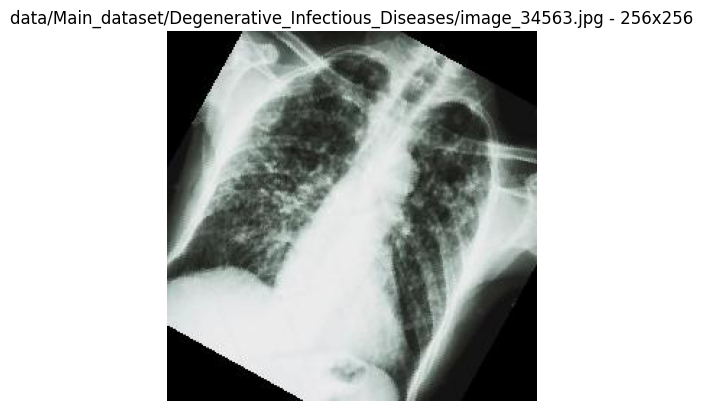

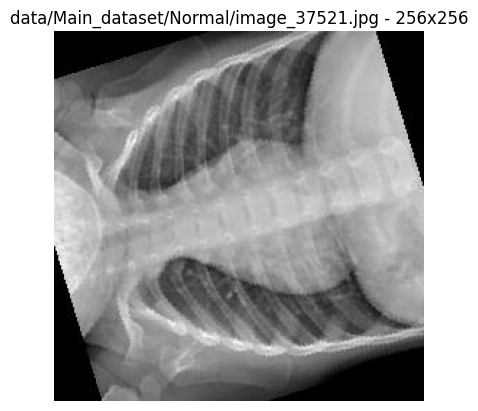

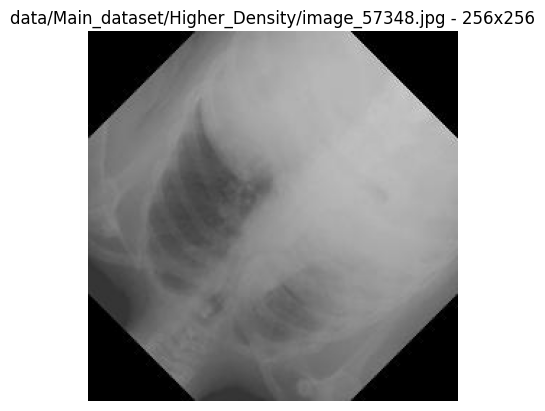

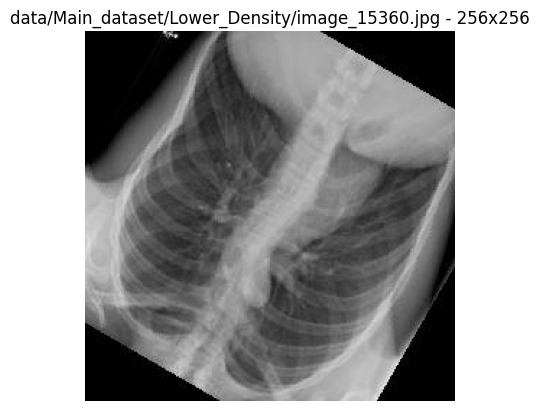

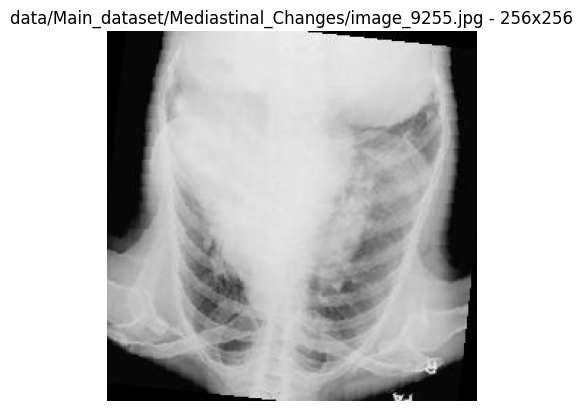

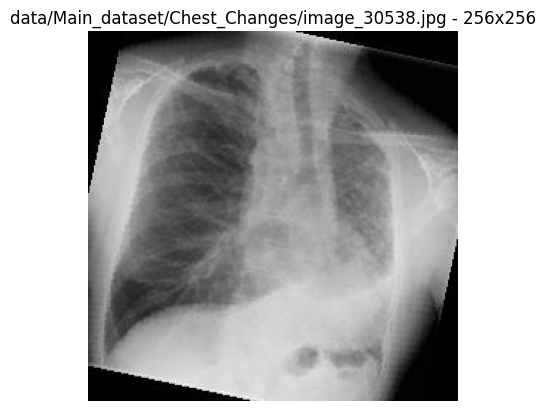

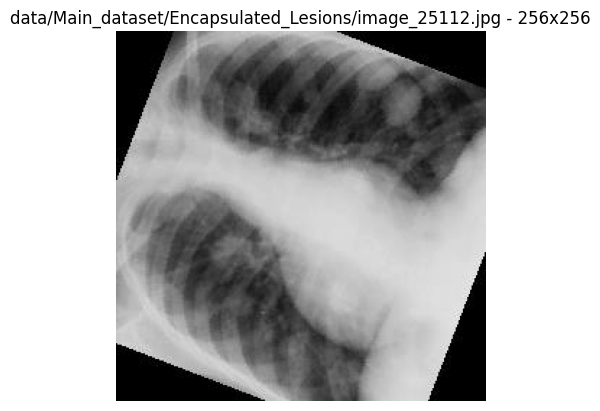

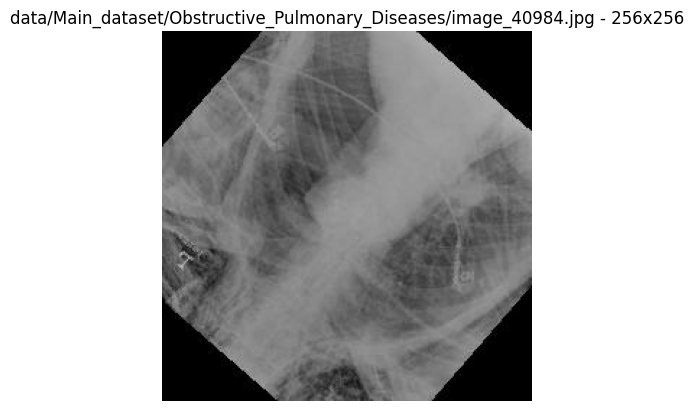

In [46]:
# Fonction pour afficher une image JPEG
def show_image(image_path):
    try:
        # Ouvrir l'image
        with Image.open(image_path) as img:
            # Afficher l'image
            plt.imshow(img, cmap='gray')
            plt.axis('off')  # Supprimer les axes autour de l'image
            plt.title(f"{image_path} - {img.size[0]}x{img.size[1]}")  # Afficher les dimensions
            plt.show()
    except Exception as e:
        print(f"Erreur lors du chargement de {image_path} : {e}")


# Parcourir les sous-dossiers
for class_name in os.listdir(main_dir):
    class_path = os.path.join(main_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Trouver et afficher une image de chaque classe
    for file_name in os.listdir(class_path):
        image_path = os.path.join(class_path, file_name)
        if image_path.lower().endswith('.jpg') or image_path.lower().endswith('.jpeg'):
            # Appeler la fonction pour afficher l'image
            show_image(image_path)
            break  # Afficher une image par classe


Affichage de l'histogramme de la classe Degenerative_Infectious_Diseases...


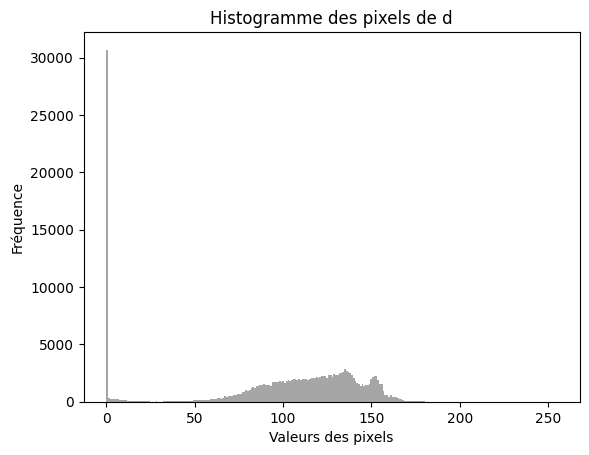

Affichage de l'histogramme de la classe Normal...


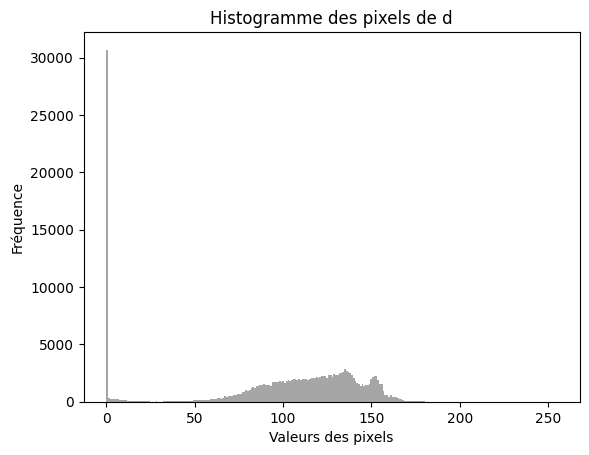

Affichage de l'histogramme de la classe .ipynb_checkpoints...


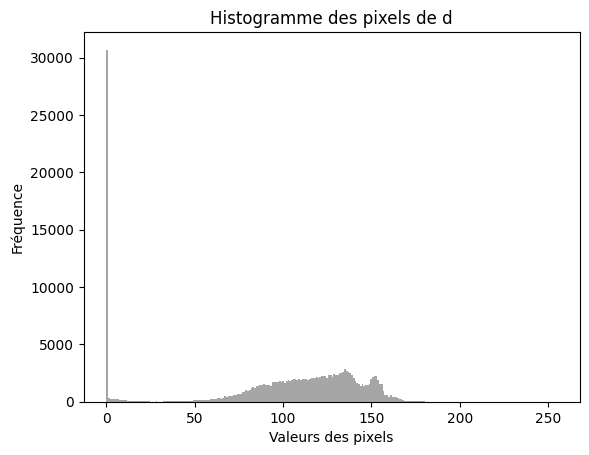

Affichage de l'histogramme de la classe Higher_Density...


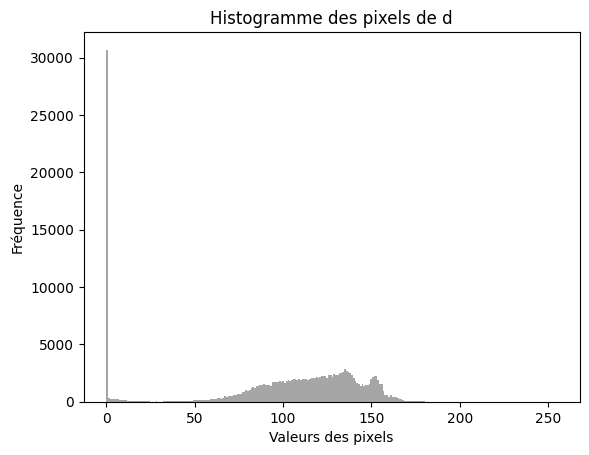

Affichage de l'histogramme de la classe Lower_Density...


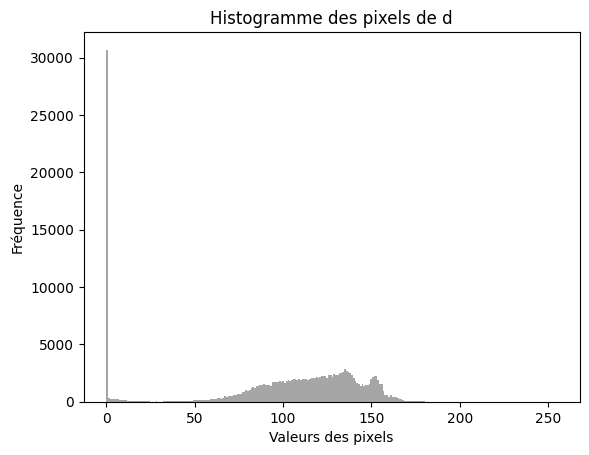

Affichage de l'histogramme de la classe Mediastinal_Changes...


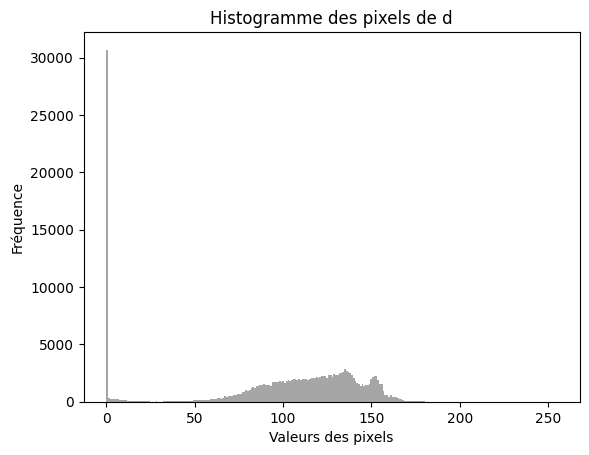

Affichage de l'histogramme de la classe Chest_Changes...


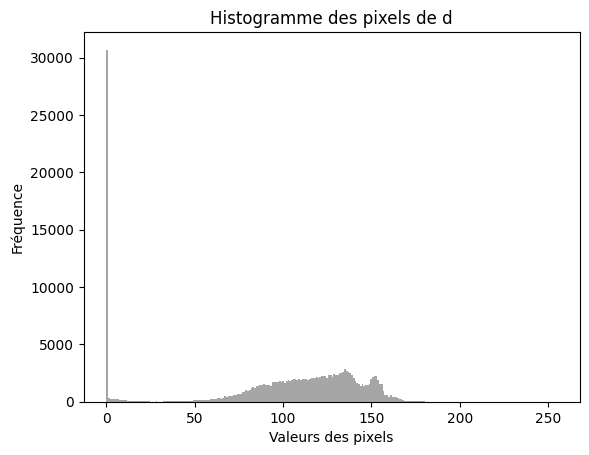

Affichage de l'histogramme de la classe Encapsulated_Lesions...


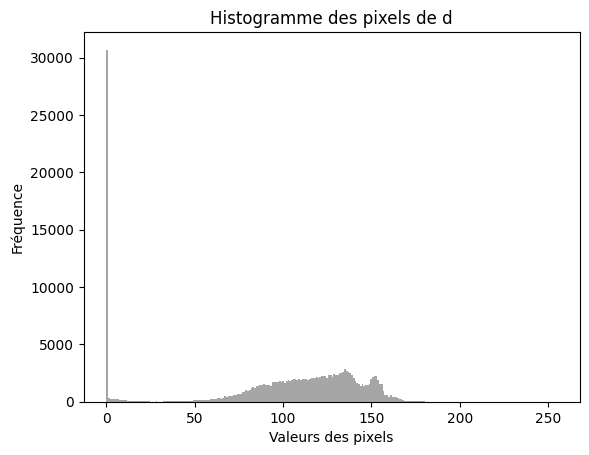

Affichage de l'histogramme de la classe Obstructive_Pulmonary_Diseases...


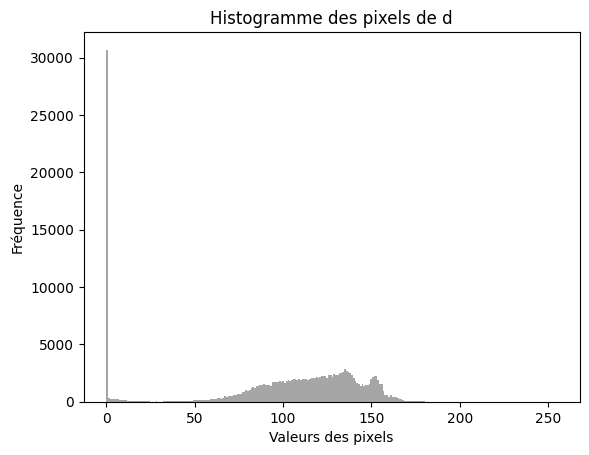

In [53]:
# Fonction pour afficher l'histogramme des pixels d'une image JPEG



# Afficher l'histogramme des pixels
def show_pixel_histogram(image_path):
    pixels = np.array(img)
    plt.hist(pixels.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
    plt.title(f"Histogramme des pixels de {image_path}")
    plt.xlabel("Valeurs des pixels")
    plt.ylabel("Fréquence")
    plt.show()

# Afficher un histogramme pour un exemple d'image
for class_name in os.listdir(main_dir):
    print(f"Affichage de l'histogramme de la classe {class_name}...")
    example_image_path = os.path.join(image_path, class_name)[0]
    show_pixel_histogram(example_image_path)



